### Aim

To build a multiple linear regression model in python that predicts the score of the players in premier soccer league.

### Data Description

The dataset used is the soccer player dataset. It has information about various players from different clubs, and it provides data over ten features with a number of goals as the target variable.

### Approach
Import the required libraries and dataset

Check for the correlation between features

Plot a graph for correlations

Remove the weakly correlated and highly multicollinear variables

Perform train test split on the dataset

Fit the multiple linear regression model

Convert categorical variables into dummy/indicator variables

Plot the results

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns

In [3]:
#Import the required dataset
df = pd.read_csv('EPL_Soccer_MLR_LR.csv')

### Explore the dataset and check for the correlation between features

In [6]:
df.columns

Index(['PlayerName', 'Club', 'DistanceCovered(InKms)', 'Goals',
       'MinutestoGoalRatio', 'ShotsPerGame', 'AgentCharges', 'BMI', 'Cost',
       'PreviousClubCost', 'Height', 'Weight', 'Score'],
      dtype='object')

In [7]:
#Get basic description of data, looking for the spread of the different variable, along with abrupt changes between
#the minimum, 25th, 50th, 75th and max.
df.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000


In [8]:
#Check the For correlation between the columns. the closer to 1 the more correlation determined between columns
corr = df.corr()
corr

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


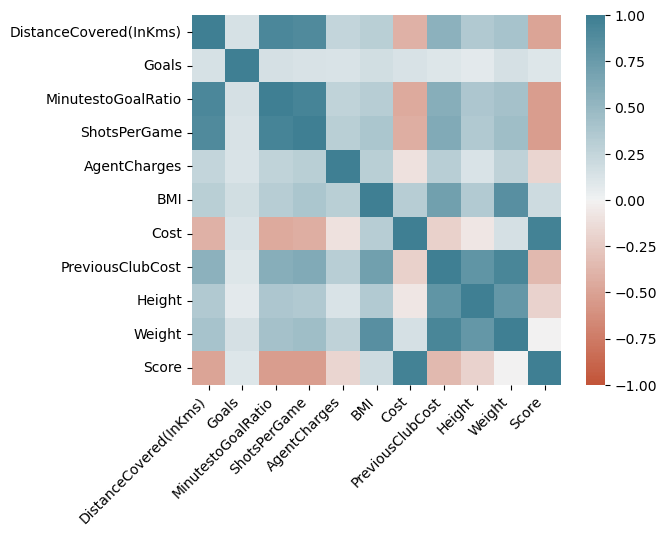

In [11]:
#create a colored graph to visual represent correlation
ax = sns.heatmap(
    corr,
    vmin = -1, vmax = 1, center = 0,
    cmap = sns.diverging_palette(20, 220, n=200),
    square = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = "right"
);

Identify weakly correlated variables: weight, height
Remove: Height and Weight

Identify the multicollinear predictors: Minutes to Goal Ratio, Shots Per game
Remove: Minutes to Goal Ratio

In [20]:
columns = df.columns
columns

Index(['PlayerName', 'Club', 'DistanceCovered(InKms)', 'Goals',
       'MinutestoGoalRatio', 'ShotsPerGame', 'AgentCharges', 'BMI', 'Cost',
       'PreviousClubCost', 'Height', 'Weight', 'Score'],
      dtype='object')

In [21]:
#Extract predictor variables
X = df[['DistanceCovered(InKms)', 'Goals','ShotsPerGame', 'AgentCharges', 'BMI', 'Cost','PreviousClubCost',]]
y = df[['Score']]

In [22]:
#Splitting with 75% trainign, 25% testing data
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75,
                                                   test_size = 0.25, random_state = 100)

In [23]:
#Force intercept term
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     476.6
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           9.69e-96
Time:                        10:25:13   Log-Likelihood:                -252.91
No. Observations:                 151   AIC:                             521.8
Df Residuals:                     143   BIC:                             546.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9.2052      1.601      5.750      0.000       6.041      12.370
DistanceCovered(InKms)    -0.6790      0.563     -1.206      0.230      -1.792       0.434
Goals                      0.0279      0.060      0.464      0.643      -0.091       0.147
ShotsPerGame              -0.1151      0.191     -0.601      0.548      -0.493       0.263
AgentCharges              -0.0023      0.002     -0.939      0.349      -0.007       0.003
BMI                        0.1841      0.077      2.386      0.018       0.032       0.337
Cost                       0.1612      0.005     31.297      0.000       0.151       0.171
PreviousClubCost          -0.0953      0.017     -5.772      0.000      -0.128      -0.063
==============================================================================
Omnibus:                        7.786   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.830
Skew:                           0.444   Prob(JB):                       0.0199
Kurtosis:                       3.675   Cond. No.                     1.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
#After looking at P>|t| values determined that I can trim down some variables to see if this is a better m,odel.
X = df[['DistanceCovered(InKms)', 'BMI', 'Cost','PreviousClubCost']]

#Retrain the data with the changes
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75,
                                                   test_size = 0.25, random_state = 100)

#Force intercept term
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     843.0
Date:                Fri, 11 Nov 2022   Prob (F-statistic):          9.28e-100
Time:                        10:25:14   Log-Likelihood:                -253.64
No. Observations:                 151   AIC:                             517.3
Df Residuals:                     146   BIC:                             532.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9.2171      1.548      5.955      0.000       6.158      12.276
DistanceCovered(InKms)    -0.9395      0.323     -2.905      0.004      -1.579      -0.300
BMI                        0.1629      0.074      2.200      0.029       0.017       0.309
Cost                       0.1628      0.005     33.617      0.000       0.153       0.172
PreviousClubCost          -0.0961      0.016     -5.861      0.000      -0.129      -0.064
==============================================================================
Omnibus:                        7.362   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                7.506
Skew:                           0.412   Prob(JB):                       0.0234
Kurtosis:                       3.717   Cond. No.                     1.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
#Let's try throwing in club
clubs = set(df.Club)
clubs #CHE, MUN, LIV


#to encode text into a number that is easier for the machine learnign maodel to understand
nominal_features = pd.get_dummies(df['Club'])
nominal_features

,CHE,LIV,MUN
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
197,0,1,0
198,0,1,0
199,0,1,0
200,0,1,0


In [26]:
#Concat is when you are combining two dataframes. Only works when you have the same number of row in each dataset and should join side by side.
df_encoded = pd.concat([df, nominal_features], axis = 1)
df_encoded

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score,CHE,LIV,MUN
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75,0,0,1
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30,0,0,1
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88,0,0,1
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66,0,0,1
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,"Ryan, Mr. Patrick",LIV,4.90,7.6,45.6,16.0,90,27.56,67.2,82.00,183.9,93.2,11.79,0,1,0
198,"Saad, Mr. Amin",LIV,5.66,8.3,50.2,17.7,38,23.76,56.5,72.00,183.5,80.0,10.05,0,1,0
199,"Saad, Mr. Khalil",LIV,5.03,6.4,42.7,14.3,122,22.01,47.6,68.00,183.1,73.8,8.51,0,1,0
200,"Saade, Mr. Jean Nassr",LIV,4.97,8.8,43.0,14.9,233,22.34,60.4,63.00,178.4,71.1,11.50,0,1,0


In [28]:
X = df_encoded[['DistanceCovered(InKms)', 'BMI', 'Cost','PreviousClubCost', 'CHE','MUN','LIV']]

In [29]:
#Retrain the data with the changes
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75,
                                                   test_size = 0.25, random_state = 100)

#Force intercept term
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     691.4
Date:                Fri, 11 Nov 2022   Prob (F-statistic):          1.79e-103
Time:                        10:26:29   Log-Likelihood:                -237.58
No. Observations:                 151   AIC:                             489.2
Df Residuals:                     144   BIC:                             510.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3.9020      1.180      3.306      0.001       1.569       6.235
DistanceCovered(InKms)    -0.3125      0.316     -0.989      0.324      -0.937       0.312
BMI                        0.2677      0.070      3.826      0.000       0.129       0.406
Cost                       0.1459      0.005     27.435      0.000       0.135       0.156
PreviousClubCost          -0.0984      0.015     -6.578      0.000      -0.128      -0.069
CHE                        0.9915      0.424      2.336      0.021       0.153       1.830
MUN                        2.5777      0.363      7.109      0.000       1.861       3.294
LIV                        0.3328      0.510      0.652      0.515      -0.676       1.341
==============================================================================
Omnibus:                        2.294   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.318   Jarque-Bera (JB):                1.891
Skew:                           0.260   Prob(JB):                        0.389
Kurtosis:                       3.174   Cond. No.                     6.26e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.04e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

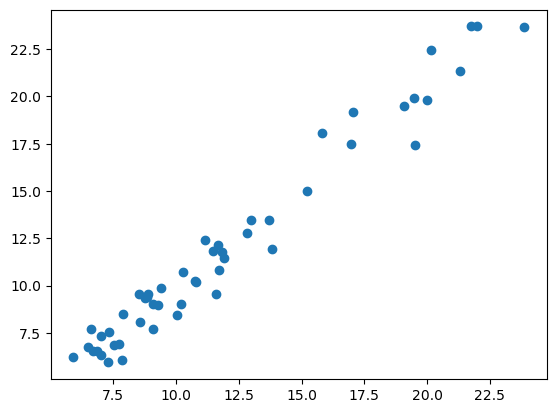

In [30]:
#Look at the model plot
x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)

plt.scatter(y_test_fitted, y_test)
#plt.plot(x_test, y_test_fitted, 'r')
plt.show()